<a href="https://colab.research.google.com/github/amol9359/Project-of-mushroom-classifcation/blob/main/project_of_classification_of_mushroom2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


from google.colab import files
uploaded = files.upload()

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
df1 = pd.read_csv("/content/mushrooms.csv")

In [ ]:
df1.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
for column in df1.columns:
    count = df1[column][df1[column]=='?'].count()
    if count!=0:
        print(column, df1[column][df1[column]=='?'].count())

stalk-root 2480


In [ ]:
df1["stalk-root"] =df1["stalk-root"].replace('?',np.nan)  

In [ ]:
df1.isna().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [ ]:
!pip install autoimpute
from autoimpute.imputations import SingleImputer,MultipleImputer
from autoimpute.imputations.series import MultinomialLogisticImputer

     |████████████████████████████████| 97 kB 3.3 MB/s 


In [ ]:
impute = SingleImputer(strategy='categorical')

In [ ]:
impute.fit(df1)

SingleImputer(strategy='categorical')

In [ ]:
df=impute.transform(df1)

In [ ]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [ ]:
X = df.drop(['class'], axis=1)  
y = df["class"]


In [ ]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,cap-color_3,cap-color_4,cap-color_5,cap-color_6,cap-color_7,cap-color_8,cap-color_9,bruises_1,odor_1,odor_2,odor_3,odor_4,odor_5,odor_6,odor_7,odor_8,gill-attachment_1,gill-spacing_1,gill-size_1,gill-color_1,gill-color_2,gill-color_3,gill-color_4,gill-color_5,gill-color_6,gill-color_7,gill-color_8,gill-color_9,gill-color_10,gill-color_11,...,stalk-color-above-ring_5,stalk-color-above-ring_6,stalk-color-above-ring_7,stalk-color-above-ring_8,stalk-color-below-ring_1,stalk-color-below-ring_2,stalk-color-below-ring_3,stalk-color-below-ring_4,stalk-color-below-ring_5,stalk-color-below-ring_6,stalk-color-below-ring_7,stalk-color-below-ring_8,veil-color_1,veil-color_2,veil-color_3,ring-number_1,ring-number_2,ring-type_1,ring-type_2,ring-type_3,ring-type_4,spore-print-color_1,spore-print-color_2,spore-print-color_3,spore-print-color_4,spore-print-color_5,spore-print-color_6,spore-print-color_7,spore-print-color_8,population_1,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


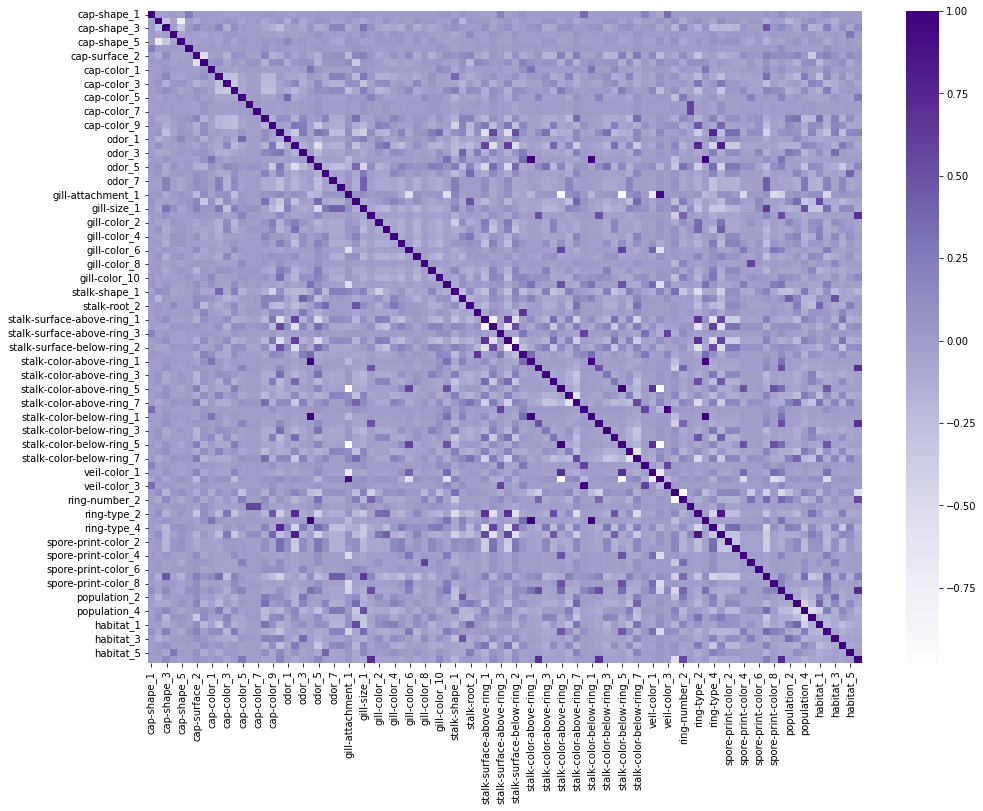

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(X.corr(),linewidths=.0,cmap="Purples")
plt.yticks(rotation=0);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X2 = sc.fit_transform(X)
X_test = sc.transform(X_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train) 
X_test_pca=pca.transform(X_test)
print("Original shape:",X_train.shape)
print('Shape of PCA data:',X_train_pca.shape)

Original shape: (5686, 94)
Shape of PCA data: (5686, 2)


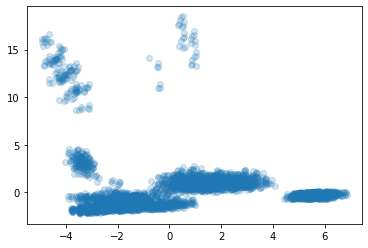

In [ ]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.2)

Logistic regression using PCA

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_pca,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_predict, cross_val_score
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,lr.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,lr.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,lr.predict(X_train_pca))))
res = cross_val_score(lr, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.9047

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2951
           1       0.95      0.84      0.89      2735

    accuracy                           0.90      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.91      0.90      0.90      5686


Confusion Matrix:
[[2836  115]
 [ 427 2308]]

Average Accuracy:	0.9043

Standard Deviation:	0.0108


In [ ]:
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,lr.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,lr.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,lr.predict(X_test_pca))))

TEST RESULTS:

Accuracy Score: 0.9020

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1257
           1       0.96      0.83      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438


Confusion Matrix:
[[1217   40]
 [ 199  982]]



Decision Tree using PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DT

dt = DT(criterion='entropy',random_state=42)
dt.fit(X_train_pca,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,dt.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,dt.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,dt.predict(X_train_pca))))
res = cross_val_score(dt, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	0.8834

Standard Deviation:	0.0132


In [ ]:
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,dt.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,dt.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,dt.predict(X_test_pca))))

TEST RESULTS:

Accuracy Score: 0.8790

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1257
           1       0.87      0.88      0.88      1181

    accuracy                           0.88      2438
   macro avg       0.88      0.88      0.88      2438
weighted avg       0.88      0.88      0.88      2438


Confusion Matrix:
[[1108  149]
 [ 146 1035]]



Support vactor machines using PCA

In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state=42, gamma="auto", probability=True)
svm.fit(X_train_pca, y_train)

SVC(gamma='auto', probability=True, random_state=42)

In [ ]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,svm.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,svm.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,svm.predict(X_train_pca))))
res = cross_val_score(svm, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.9209

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2951
           1       0.97      0.86      0.91      2735

    accuracy                           0.92      5686
   macro avg       0.93      0.92      0.92      5686
weighted avg       0.93      0.92      0.92      5686


Confusion Matrix:
[[2882   69]
 [ 381 2354]]

Average Accuracy:	0.9198

Standard Deviation:	0.0100


In [ ]:
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,svm.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,svm.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,svm.predict(X_test_pca))))

TEST RESULTS:

Accuracy Score: 0.9192

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1257
           1       0.98      0.85      0.91      1181

    accuracy                           0.92      2438
   macro avg       0.93      0.92      0.92      2438
weighted avg       0.93      0.92      0.92      2438


Confusion Matrix:
[[1236   21]
 [ 176 1005]]



KNN using PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN()
knn.fit(X_train_pca,y_train)

KNeighborsClassifier()

In [ ]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,knn.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,knn.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,knn.predict(X_train_pca))))
res = cross_val_score(knn, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.9362

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2951
           1       0.97      0.89      0.93      2735

    accuracy                           0.94      5686
   macro avg       0.94      0.93      0.94      5686
weighted avg       0.94      0.94      0.94      5686


Confusion Matrix:
[[2878   73]
 [ 290 2445]]

Average Accuracy:	0.9210

Standard Deviation:	0.0131


In [ ]:
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,knn.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,knn.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,knn.predict(X_test_pca))))

TEST RESULTS:

Accuracy Score: 0.9221

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1257
           1       0.96      0.88      0.92      1181

    accuracy                           0.92      2438
   macro avg       0.93      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438


Confusion Matrix:
[[1211   46]
 [ 144 1037]]



Random Forest using PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
rf.fit(X_train_pca, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [ ]:
print("TRAINING RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,rf.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,rf.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,rf.predict(X_train_pca))))
res = cross_val_score(rf, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

TRAINING RESULTS:

Accuracy Score: 0.9988

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2949    2]
 [   5 2730]]

Average Accuracy:	0.9163

Standard Deviation:	0.0114


In [ ]:
print("TEST RESULTS:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,rf.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,rf.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,rf.predict(X_test_pca))))

TEST RESULTS:

Accuracy Score: 0.9143

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1257
           1       0.94      0.87      0.91      1181

    accuracy                           0.91      2438
   macro avg       0.92      0.91      0.91      2438
weighted avg       0.92      0.91      0.91      2438


Confusion Matrix:
[[1196   61]
 [ 148 1033]]



In [ ]:
df.to_read